In [1]:
import numpy as np
import pandas as pd
import seaborn

from data_download import download_data
from data_exploration import data_exploration, load_meta_data
from utils_ import visualize_sample,visualize_bounding_box_2
from convert_to_yolo_format import create_req_dirs, convert_data_to_yolo_format


# GLOBAL KEYS

In [2]:
# SAMPLE DATA
img_key = "vwg-0589-0040"
visual_path = "./data/visualizations"
yolo_path = "./yolo"

# DOWNLOAD AND EXTRACT DATA

In [3]:
download_data("data")

Directory is not empty


 # DATA EXPLORATION

In [4]:
folder_paths = data_exploration()
print(folder_paths)

Total Folders inside Directory =  5 ['bboxes', 'images', 'labelIds', 'params', 'visualizations']
dirpath  data/bboxes have file count : 8034
dirpath  data/images have file count : 8034
dirpath  data/labelIds\CropAndWeed have file count : 8034
dirpath  data/params have file count : 8034
dirpath  data/visualizations have file count : 3
['data/bboxes', 'data/images', 'data/labelIds\\CropAndWeed', 'data/params', 'data/visualizations']
['data/bboxes', 'data/images', 'data/labelIds\\CropAndWeed', 'data/params', 'data/visualizations']


In [5]:
meta_data = load_meta_data(folder_paths)

Getting meta data for  data\bboxes
Getting meta data for  data\images
Getting meta data for  data\labelIds\CropAndWeed
Getting meta data for  data\params
Getting meta data for  data\visualizations
Collected Meta data for  8034 files


In [6]:
meta_data[img_key]

{'bboxes': 'data\\bboxes\\vwg-0589-0040.csv',
 'images': 'data\\images\\vwg-0589-0040.jpg',
 'labelIds': 'data\\labelIds\\CropAndWeed\\vwg-0589-0040.png',
 'params': 'data\\params\\vwg-0589-0040.csv',
 'visualizations': 'data\\visualizations\\vwg-0589-0040.jpg'}

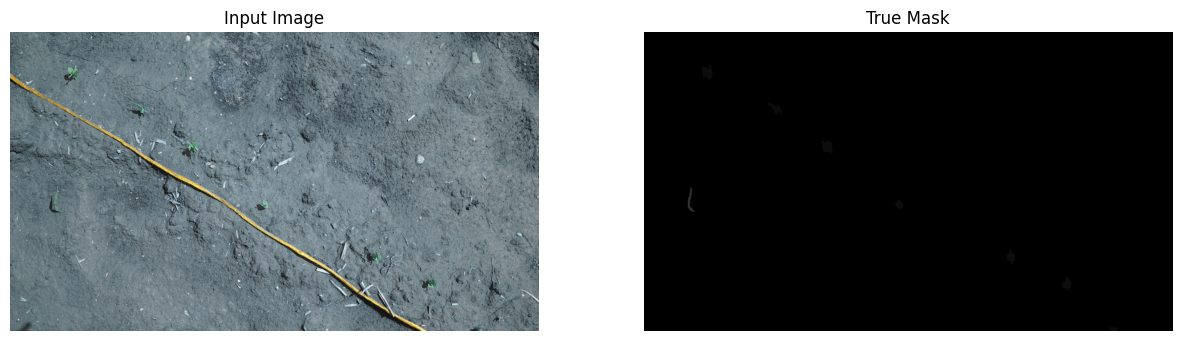

In [7]:
visualize_sample(meta_data, key=img_key)

In [8]:
## check bounding box
sample_box = pd.read_csv(meta_data[img_key]['bboxes'])
sample_box

,157,565,182,657,48,173,648
0,449,256,498,302,13,481,283
1,209,120,247,180,13,228,150
2,644,397,684,444,13,664,420
3,1314,790,1346,845,13,1330,817
4,1517,887,1549,940,13,1533,914
5,911,612,940,645,13,926,629
6,1690,1072,1717,1088,13,1703,1080


### Visualize bounding box

vwg-0589-0040.jpg
data\visualizations\vwg-0589-0040.jpg


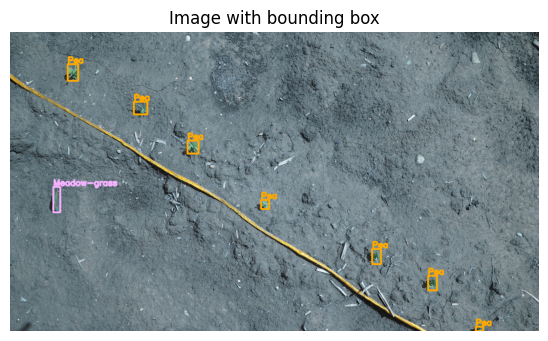

In [9]:
visualize_bounding_box_2(meta_data[img_key]['images'], meta_data[img_key]['bboxes'], visual_path)

## Since the Data for bounding boxes is present in CSV format with Top, Left, Bottom, Right, Class, Stem x, Stem y Need to convert for using YOLO

In [10]:
# Create Required Directory
create_req_dirs(yolo_path)

In [11]:
convert_data_to_yolo_format(meta_data, yolo_path)

/images Directory is not empty
Exception occured while reading csv : data\bboxes\ave-0000-0002.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0000-0005.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0217-0001.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0223-0014.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0223-0015.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0223-0016.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0223-0020.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0238-0016.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0293-0007.csv No columns to parse from file
Exception occured while reading csv : data\bboxes\ave-0293-0008.csv No columns to parse

## Dataset statistics

### Load Dataset


In [23]:
import os


def load_data_yolo(bbox_folder):
    bounding_box_data = []
    bounding_box_count = 0

    for box_path in os.listdir(bbox_folder):
        box_path = os.path.join(bbox_folder, box_path)
        if os.path.exists(box_path):
            with open(box_path, 'r') as box_file:
                bounding_boxes = []

                for line in box_file.readlines():
                    parts = line.strip().split()
                    class_id = int(parts[0])  # Class ID
                    center_x = float(parts[1])  # Center X
                    center_y = float(parts[2])  # Center Y
                    width = float(parts[3])  # Width
                    height = float(parts[4])  # Height
                    bounding_boxes.append({
                        'label_id': class_id,
                        'left': center_x,
                        'top': center_y,
                        'right': width,
                        'bottom': height
                        })

                    bounding_box_count+=1

            bounding_box_data.append((box_path, bounding_boxes))


    print("TOTAL BOUNDING BOXES :" , bounding_box_count)
    return bounding_box_data

In [24]:
bounding_box_data = load_data_yolo('./yolo/labels')

TOTAL BOUNDING BOXES : 111953


In [25]:
bounding_box_data

[('./yolo/labels\\ave-0000-0001.txt',
  [{'label_id': 48,
    'left': 0.23984375,
    'top': 0.3147977941176471,
    'right': 0.015104166666666667,
    'bottom': 0.024816176470588234}]),
 ('./yolo/labels\\ave-0000-0002.txt', []),
 ('./yolo/labels\\ave-0000-0005.txt', []),
 ('./yolo/labels\\ave-0007-0000.txt',
  [{'label_id': 83,
    'left': 0.06770833333333333,
    'top': 0.0625,
    'right': 0.011458333333333333,
    'bottom': 0.029411764705882353},
   {'label_id': 35,
    'left': 0.15703125,
    'top': 0.046875,
    'right': 0.009895833333333333,
    'bottom': 0.027573529411764705},
   {'label_id': 100,
    'left': 0.16432291666666668,
    'top': 0.05376838235294118,
    'right': 0.005729166666666666,
    'bottom': 0.017463235294117647},
   {'label_id': 100,
    'left': 0.18333333333333332,
    'top': 0.04825367647058824,
    'right': 0.005208333333333333,
    'bottom': 0.019301470588235295},
   {'label_id': 24,
    'left': 0.36614583333333334,
    'top': 0.05652573529411765,
    'ri

In [26]:
bbox_counts = []


In [30]:
i= 0
for _, bbox in bounding_box_data:
    bbox_counts.append(len(bbox))


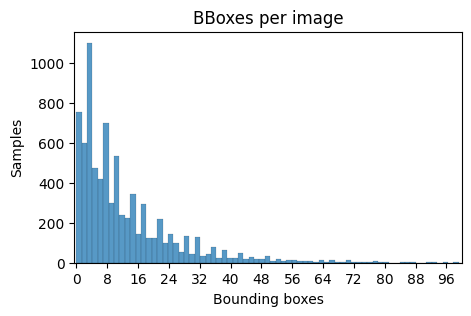

In [32]:
from matplotlib import pyplot as plt
import seaborn

plt.subplots(figsize=(5,3))
seaborn.histplot(bbox_counts)  # as we have 255 features we can abuse this plot type
plt.xticks(range(0,255,8))
plt.xlabel("Bounding boxes")
plt.ylabel("Samples")
plt.title("BBoxes per image")
plt.xlim(-0.5, 100)
plt.show()